In [22]:
from model import AirplaneFlockers
import paths
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
AIRPORTS = paths.AIRPORTS
print(AIRPORTS)

((2, 2), (3, 3), (1, 0), (1, 2), (8, 1), (8, 3))


In [24]:
worldmap, route_solutions = paths.main(AIRPORTS, width=10, height=10)

In [25]:
for p in route_solutions: print(p)

[(2, 2), (3, 2), (3, 3)]
[(1, 0), (1, 1), (1, 2)]
[(8, 1), (8, 2), (8, 3)]


In [26]:
def draw_boids(model):
    airport_x , airport_y   = [], []
    airplane_x, airplane_y = [], []
    
    airplanes = [x for x in model.schedule.agents if x.type == "airplane"]
    airports  = [x for x in model.schedule.agents if x.type == "airport" ]

    for a in airports:
        x, y = a.pos
        airport_x.append(x)
        airport_y.append(y)                    
    for a in airplanes:
        x, y = a.pos
        airplane_x.append(x)
        airplane_y.append(y)
    
    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111)
    ax.scatter(airplane_x, airplane_y, marker="2")
    ax.scatter(airport_x, airport_y, alpha=0.5, edgecolors='black')

    for (x,y) in zip(airplane_x, airplane_y):
        label = "  ✈{:.0f}".format(airplane_x.index(x)) + "({0}, {1})".format(x,y)
        plt.annotate(label, (x,y))

    plt.xlim([0, 10])
    plt.ylim([0, 10])


In [27]:
model = AirplaneFlockers(population=0, 
                         width=100, height=100, 
                         routes=route_solutions)

[2 2]
[1 0]
[8 1]


Plane 1 at position 0 ([1 0]) in direction 1
Plane 2 at position 0 ([8 1]) in direction 1
Plane 0 at position 0 ([2 2]) in direction 1
Plane 0 at position 1 ((3, 2)) in direction 1
Plane 2 at position 1 ((8, 2)) in direction 1
Plane 1 at position 1 ((1, 1)) in direction 1
Plane 2 at position 2 ((8, 3)) in direction 1
Plane 1 at position 2 ((1, 2)) in direction 1
Plane 0 at position 2 ((3, 3)) in direction 1
Plane 0 at position 2 ((3, 3)) in direction -1
Plane 2 at position 2 ((8, 3)) in direction -1
Plane 1 at position 2 ((1, 2)) in direction -1
Plane 2 at position 1 ((8, 2)) in direction -1
Plane 0 at position 1 ((3, 2)) in direction -1
Plane 1 at position 1 ((1, 1)) in direction -1
Plane 2 at position 0 ((8, 1)) in direction -1
Plane 1 at position 0 ((1, 0)) in direction -1
Plane 0 at position 0 ((2, 2)) in direction -1
Plane 0 at position 0 ((2, 2)) in direction 1
Plane 1 at position 0 ((1, 0)) in direction 1
Plane 2 at position 0 ((8, 1)) in direction 1
Plane 0 at position 1 ((3, 2

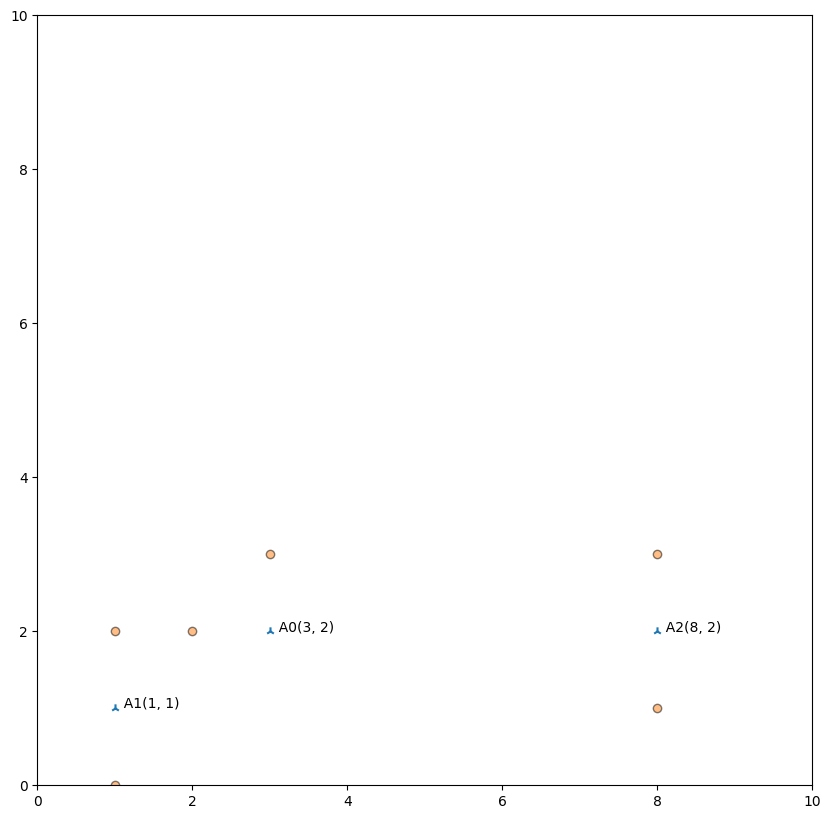

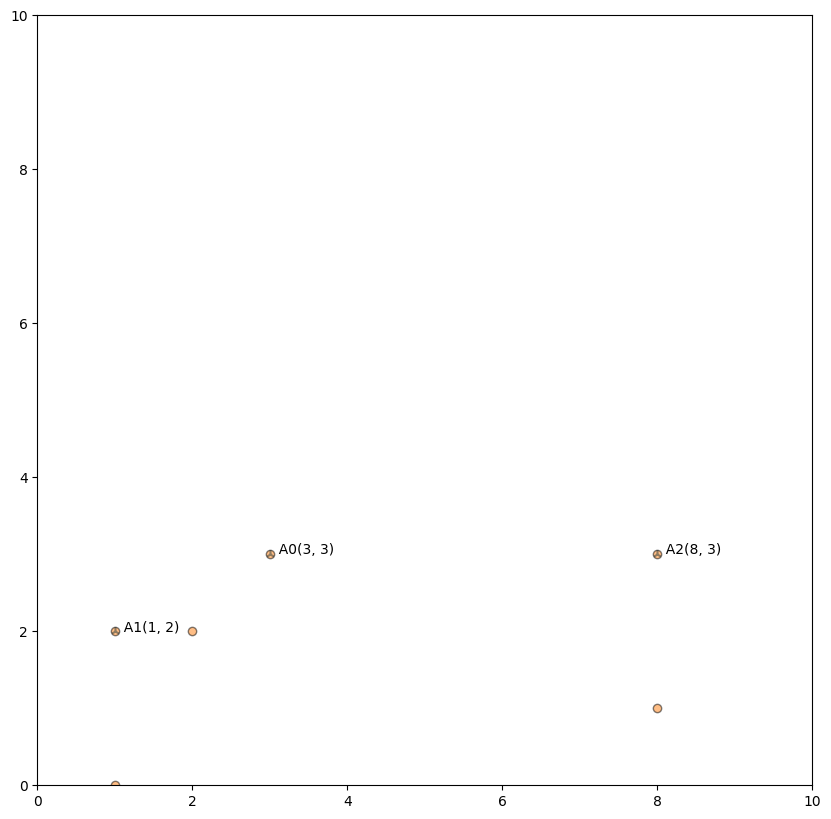

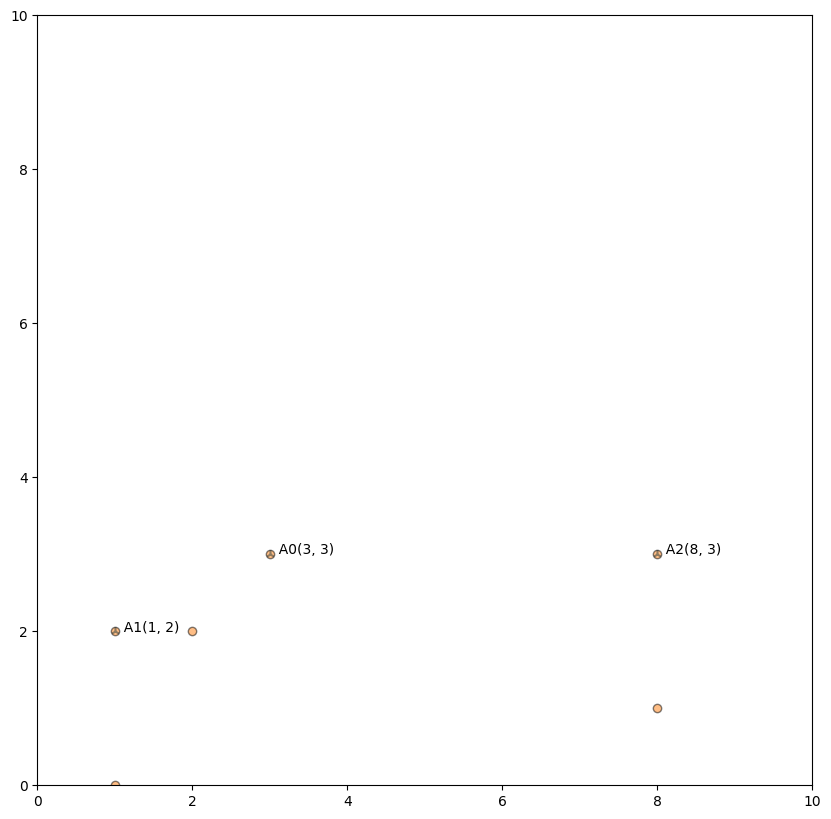

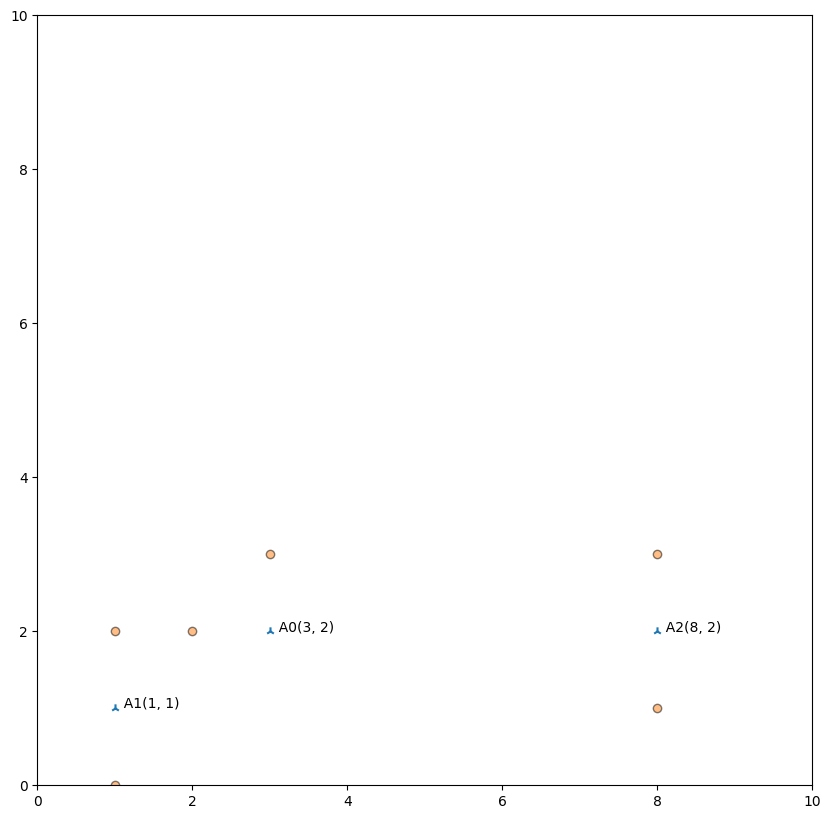

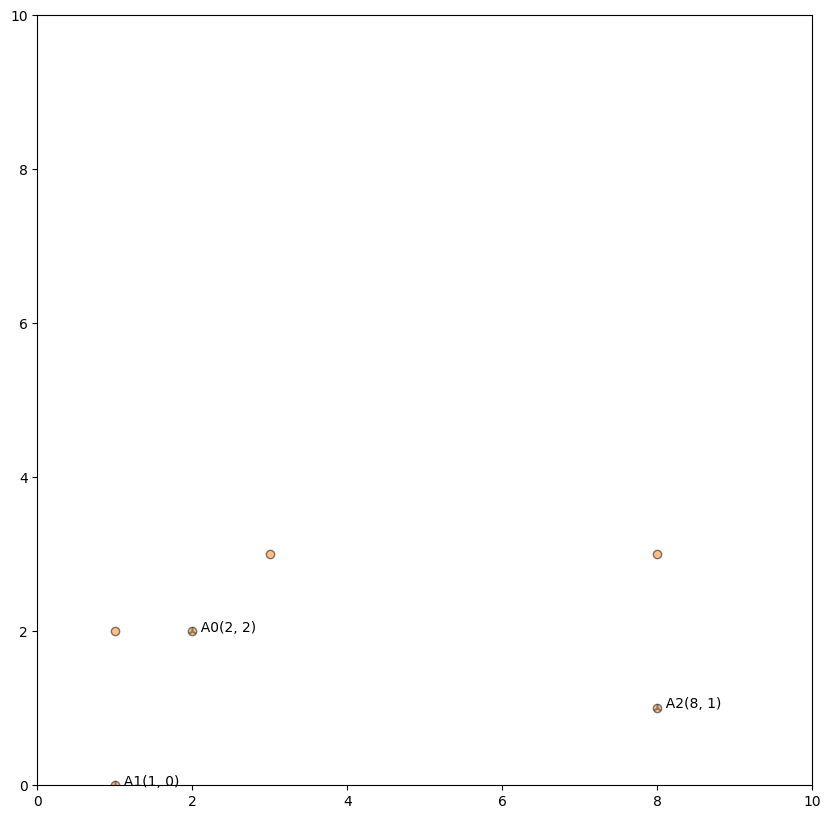

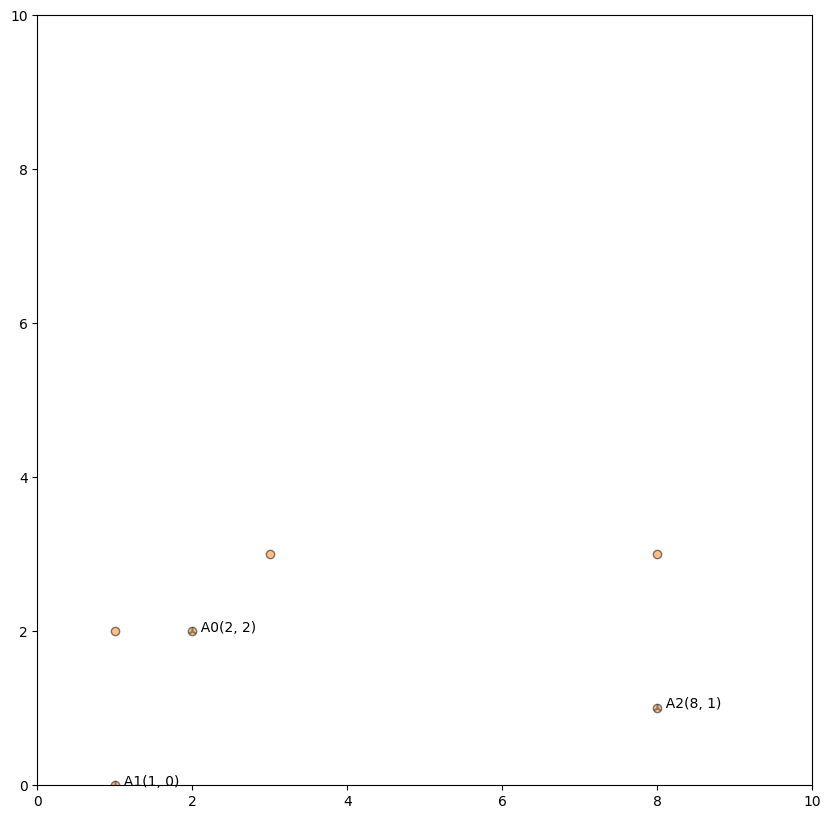

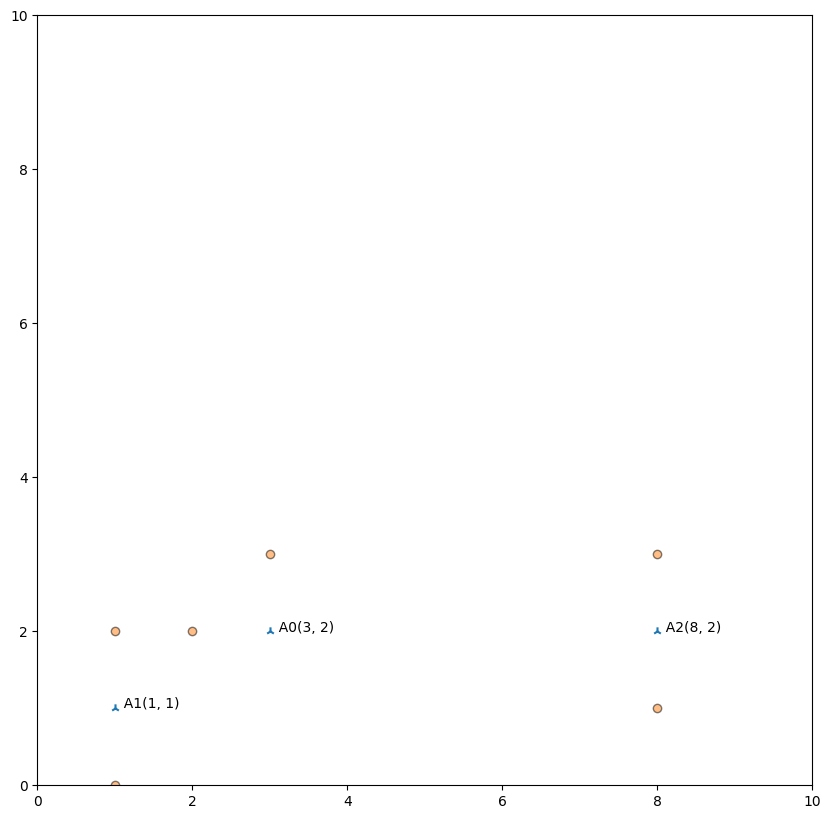

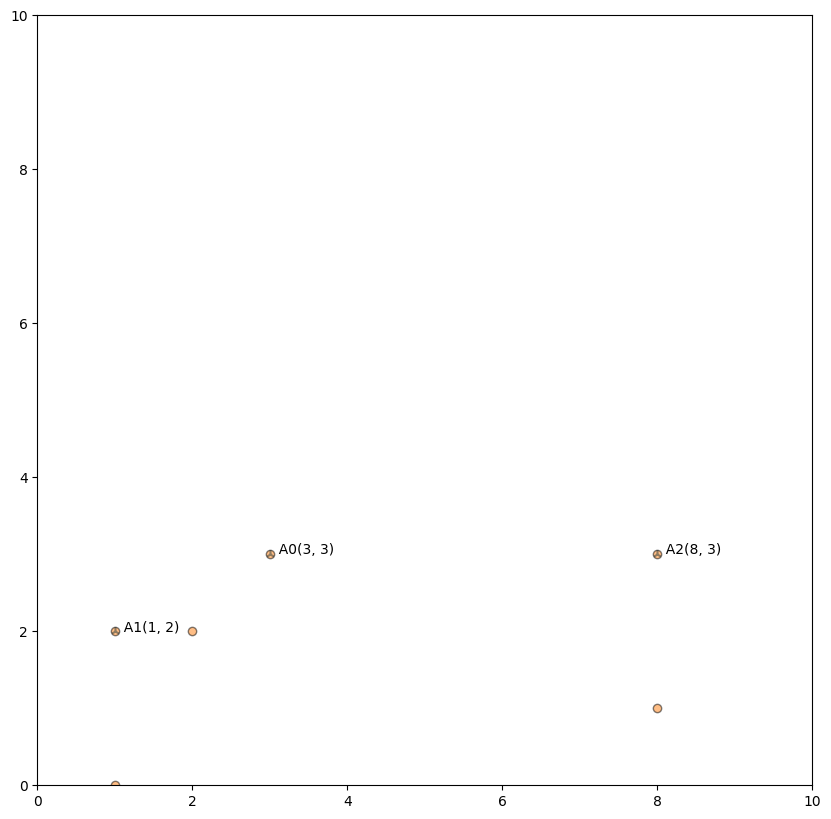

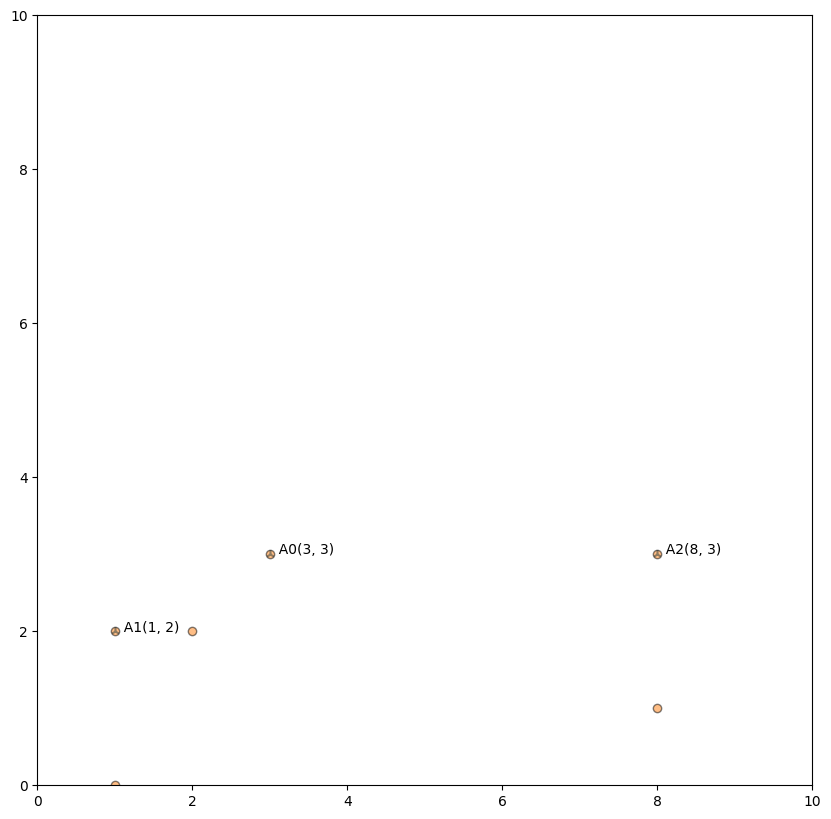

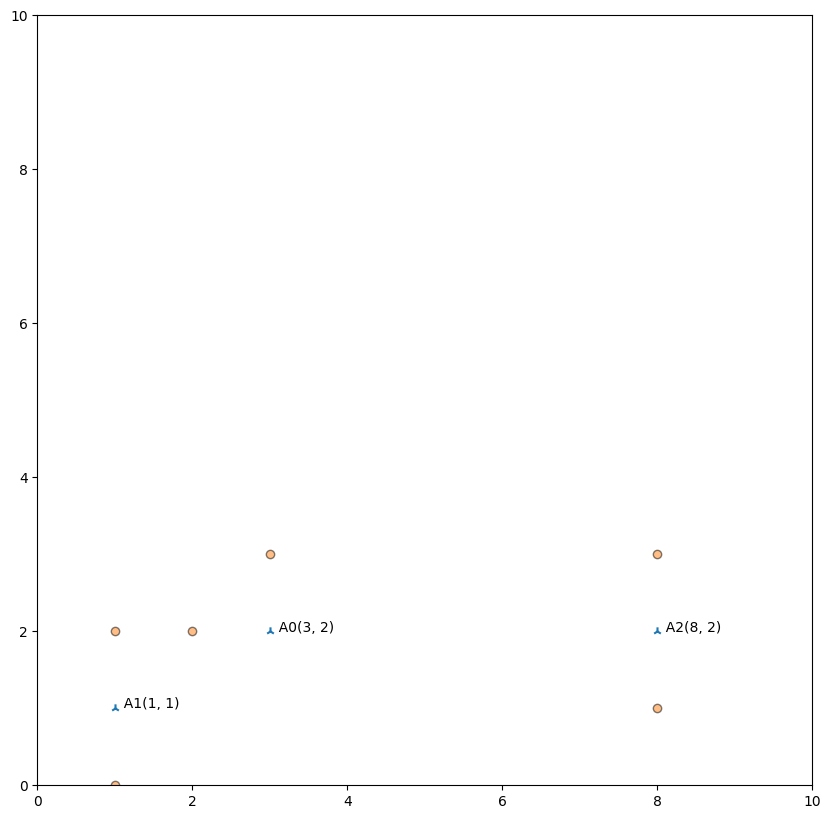

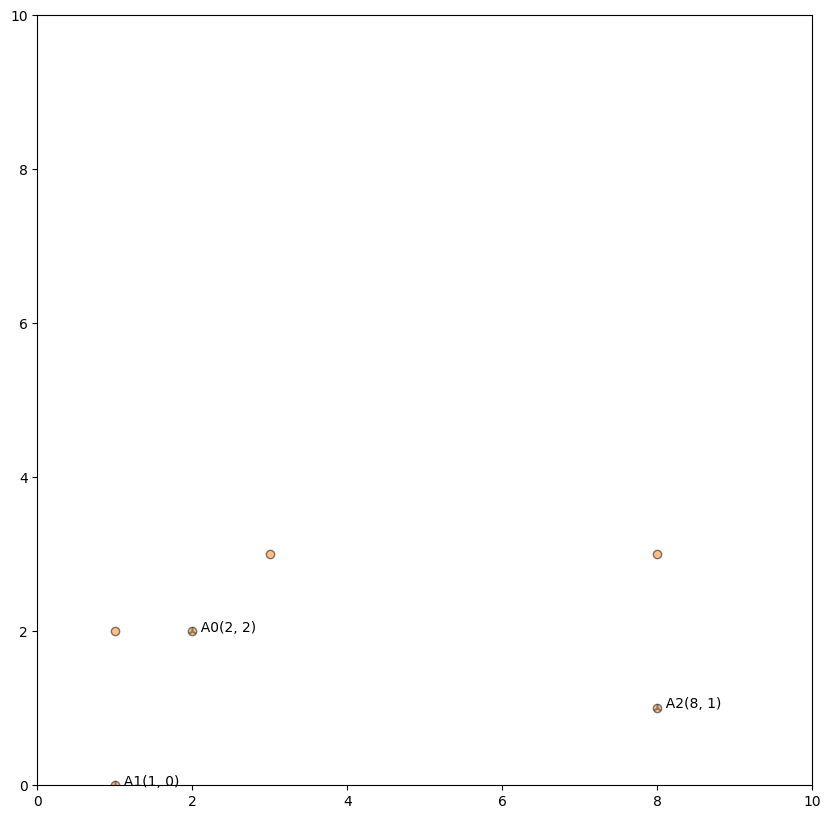

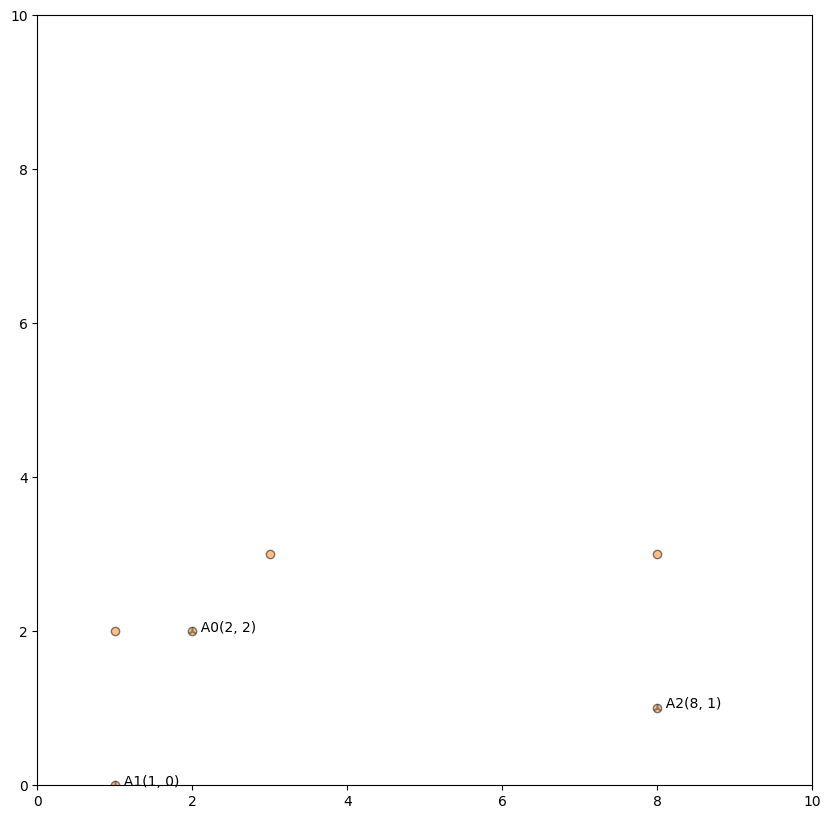

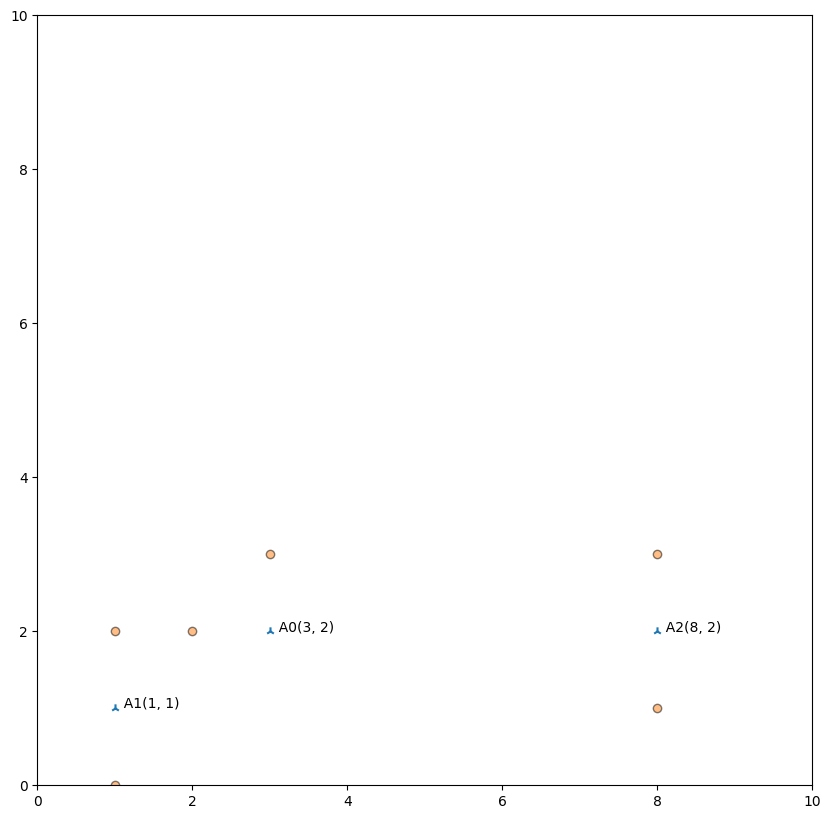

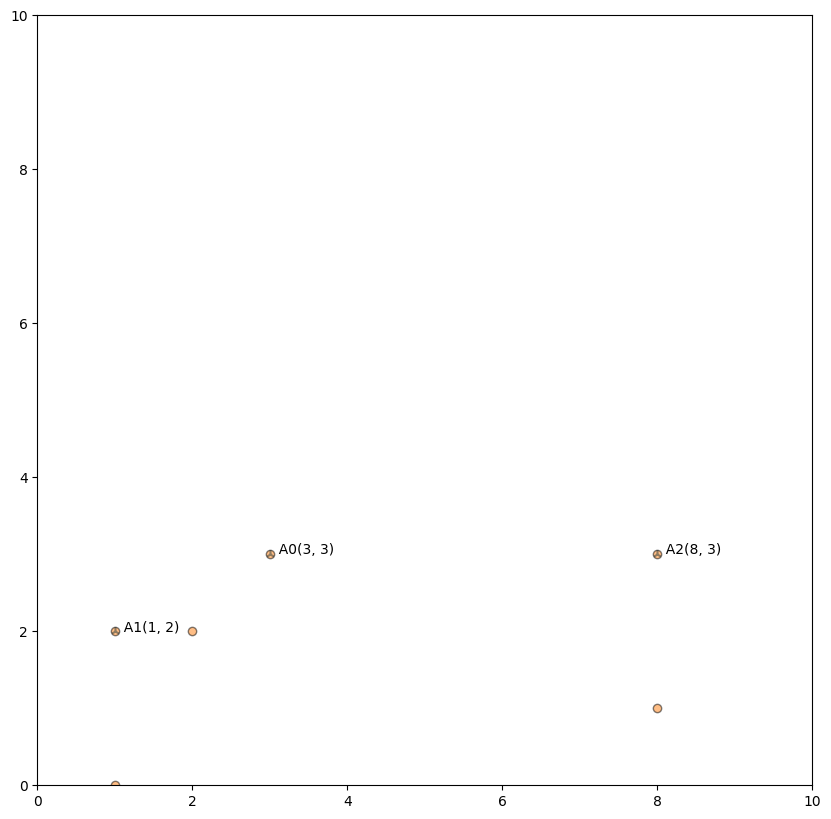

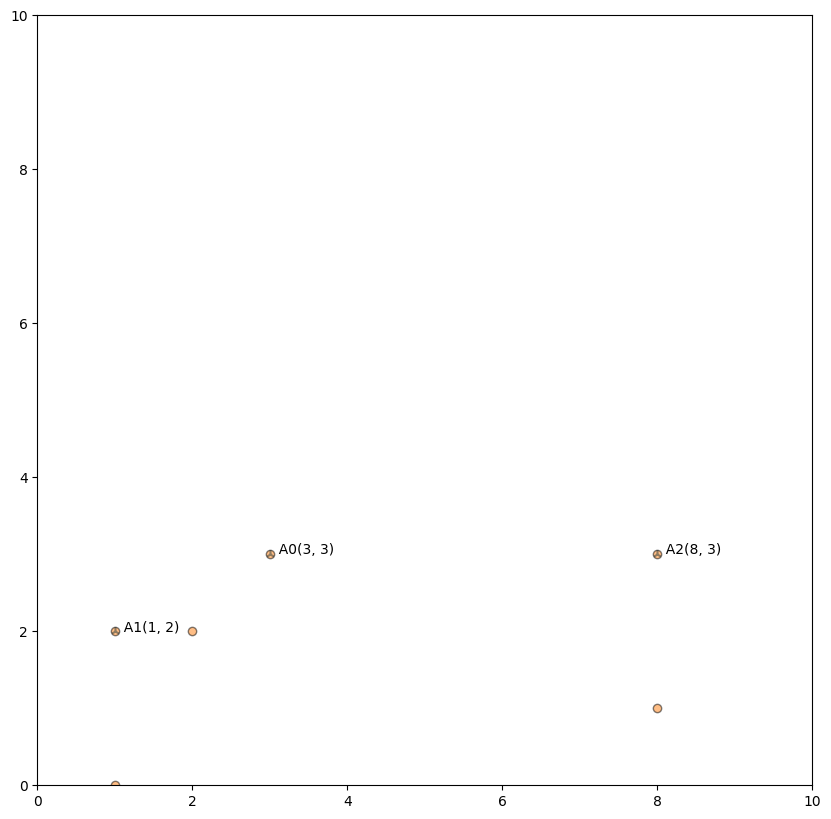

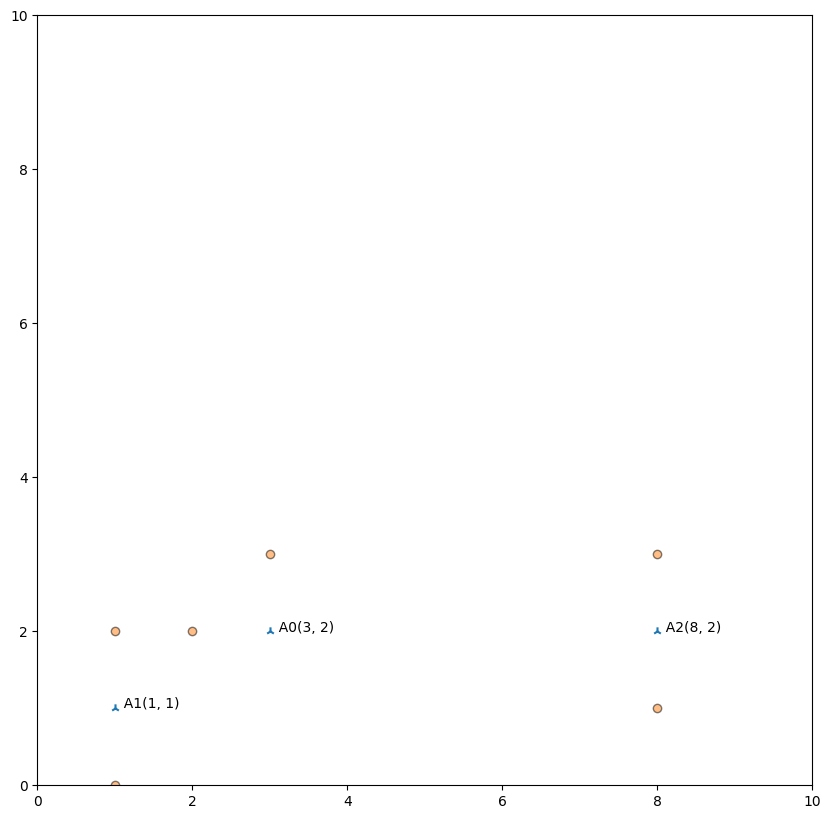

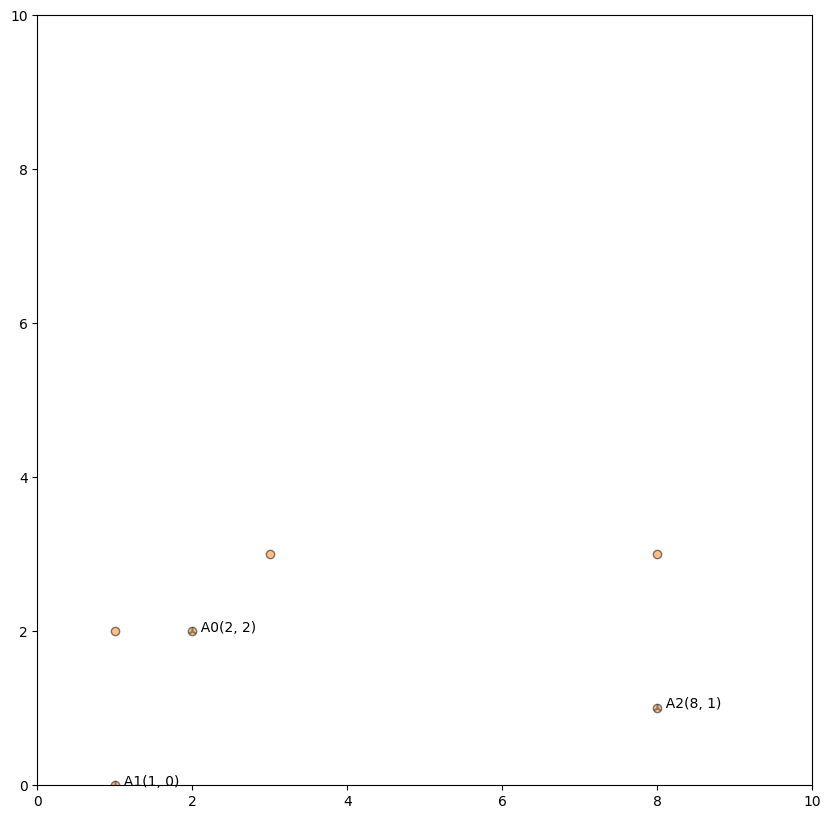

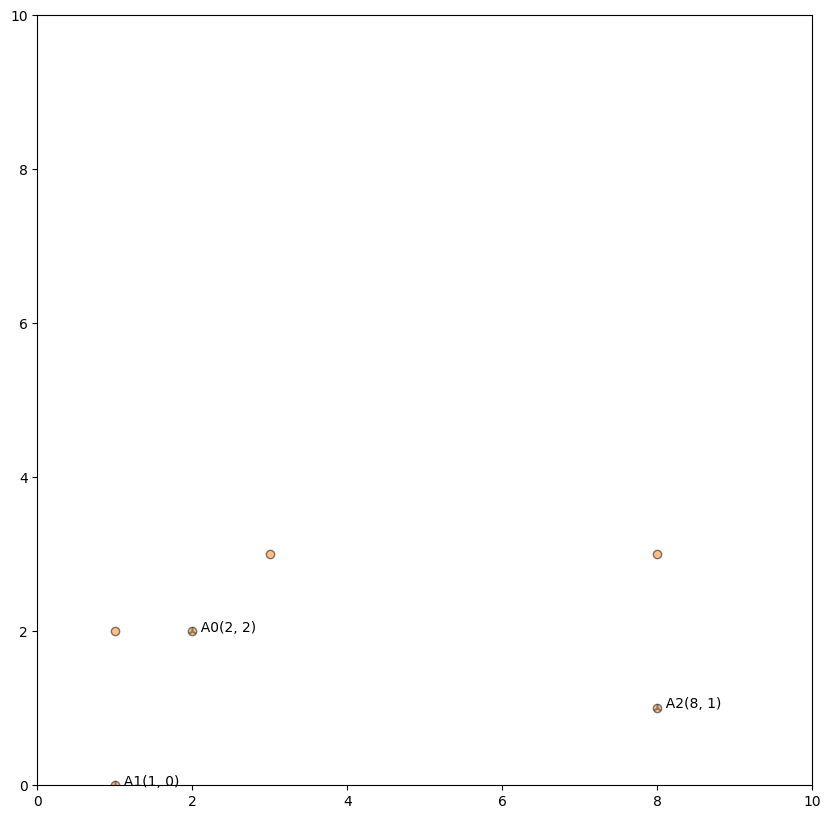

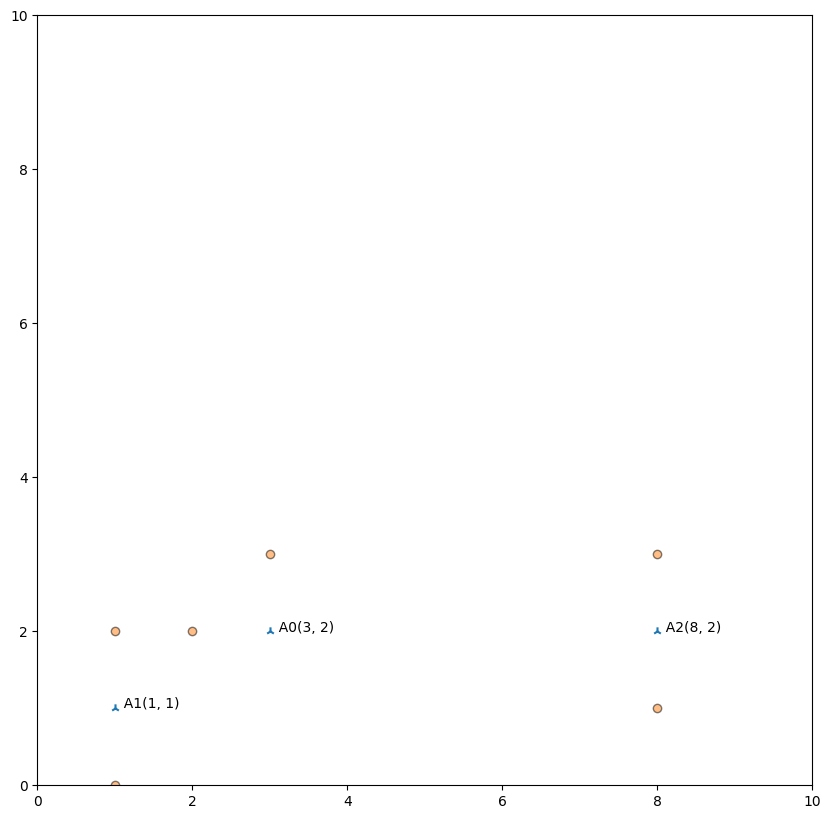

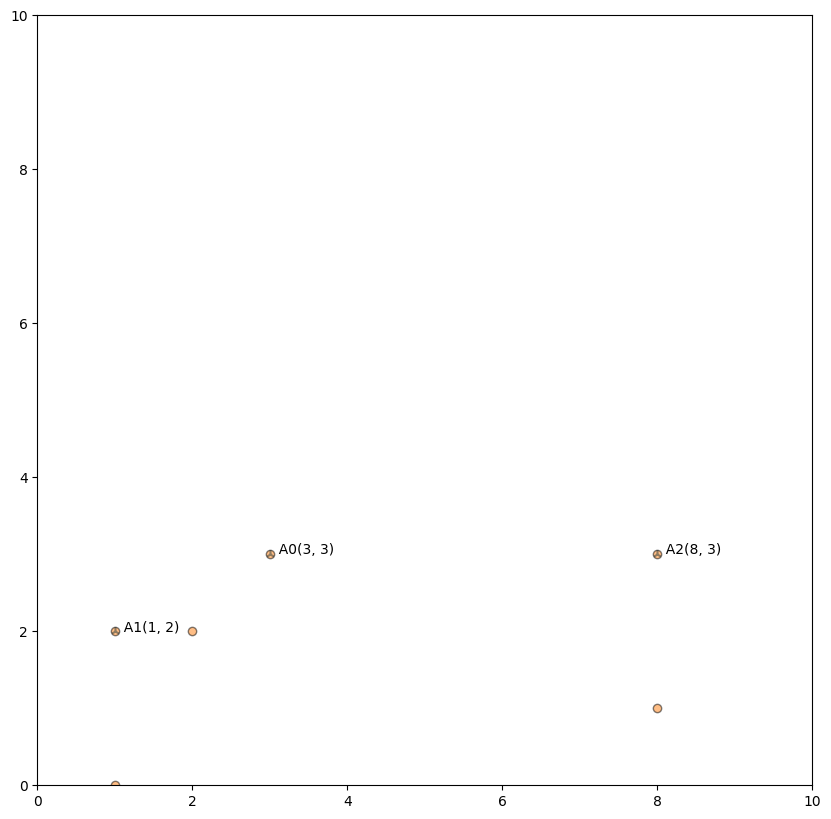

In [28]:
for i in list(range(20)):
    model.step()
    draw_boids(model)